In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [3]:
df = pd.read_csv('hou_all.csv')
print(df.shape)
df.head()

(505, 15)


,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [4]:
df.describe()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.0
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901,1.0
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991,0.0
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.0
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000,1.0
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000,1.0
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18       505 non-null    float64
 2   2.31     505 non-null    float64
 3   0        505 non-null    int64  
 4   0.538    505 non-null    float64
 5   6.575    505 non-null    float64
 6   65.2     505 non-null    float64
 7   4.09     505 non-null    float64
 8   1        505 non-null    int64  
 9   296      505 non-null    int64  
 10  15.3     505 non-null    float64
 11  396.9    505 non-null    float64
 12  4.98     505 non-null    float64
 13  24       505 non-null    float64
 14  1.1      505 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.3 KB


In [6]:
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV", "one"
]

df.columns = column_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,one
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
one        0
dtype: int64

In [8]:
df.drop(['one'], axis=1, inplace=True)
x = df.drop(['MEDV'], axis=1)
y = df['MEDV']


<Axes: >

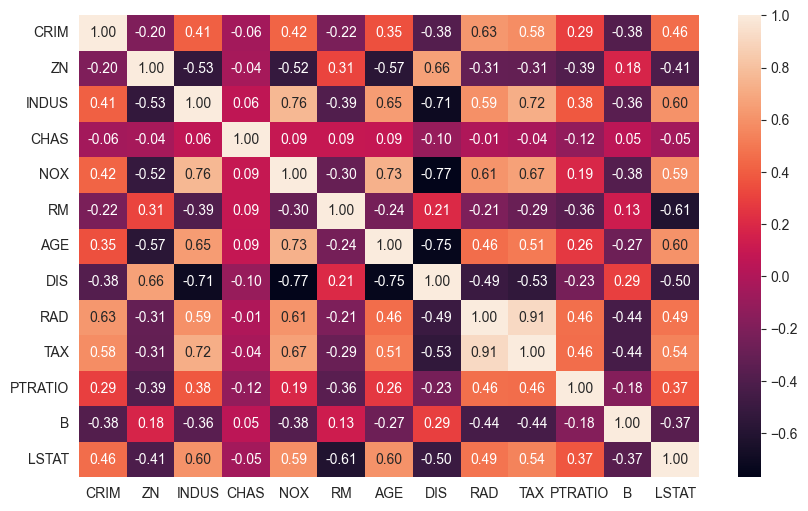

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(x.corr(), annot=True, fmt=".2f")

In [10]:
# Features important
# RM (70%)
# ZN (36%)
# B (33%)


# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to five Boston employment centres
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000's

<Axes: title={'center': '(B & MEDV'}, xlabel='B', ylabel='MEDV'>

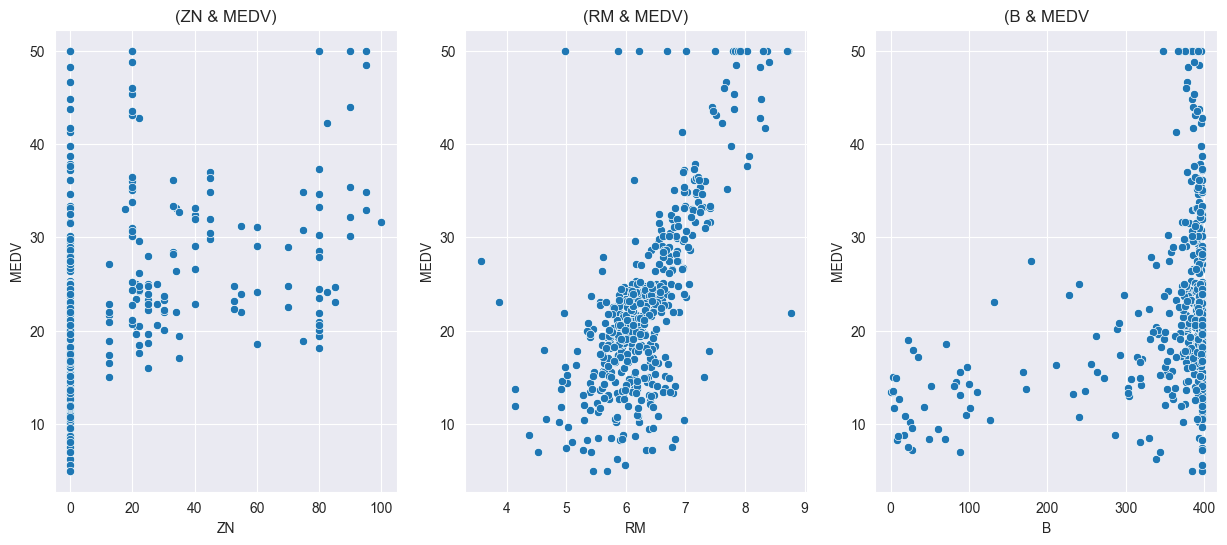

In [11]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.title("(ZN & MEDV)")
sns.scatterplot(x=df['ZN'], y=df['MEDV'])

plt.subplot(1, 3, 2)
plt.title("(RM & MEDV)")
sns.scatterplot(x=df['RM'], y=df['MEDV'])

plt.subplot(1, 3, 3)
plt.title("(B & MEDV")
sns.scatterplot(x=df['B'], y=df['MEDV'])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")

MAE: 3.19
MSE: 19.38
RMSE: 4.40


In [14]:

param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

grid_tree = GridSearchCV(DecisionTreeRegressor(), 
                         param_grid=param_grid_tree, 
                         scoring='neg_mean_squared_error', 
                         cv=5, n_jobs=-1)
grid_tree.fit(x_train, y_train)

best_param_tree = grid_tree.best_params_
print(best_param_tree)

{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
best_tree_reg = DecisionTreeRegressor(**best_param_tree)
best_tree_reg.fit(x_train, y_train)
y_pred = best_tree_reg.predict(x_test)

dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {dt_mae:.2f}")
print(f"MSE: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")

MAE: 3.04
MSE: 19.96
RMSE: 4.47


In [16]:
param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

grid_rf = GridSearchCV(RandomForestRegressor(), 
                       param_grid=param_grid_rf,
                       scoring='neg_mean_absolute_error',
                       cv=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)

best_param_rf = grid_rf.best_params_
print(best_param_rf)

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [17]:
best_rf_reg = RandomForestRegressor(**best_param_rf)

best_rf_reg.fit(x_train, y_train)
y_pred = best_rf_reg.predict(x_test)

rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")

MAE: 1.81
MSE: 5.41
RMSE: 2.33


In [18]:
param_grid_xgb = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

grid_xgb = GridSearchCV(XGBRegressor(), 
                        param_grid=param_grid_xgb, 
                        scoring='neg_mean_absolute_error', 
                        cv=5, n_jobs=-1)

grid_xgb.fit(x_train, y_train)
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)

{'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 30}


In [19]:
best_xgb_reg = XGBRegressor(**best_param_xgb)

best_xgb_reg.fit(x_train, y_train)
y_pred = best_xgb_reg.predict(x_test)

xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {xgb_mae:.2f}")
print(f"MSE: {xgb_mse:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")

MAE: 1.82
MSE: 5.96
RMSE: 2.44


(0.0, 23.0)

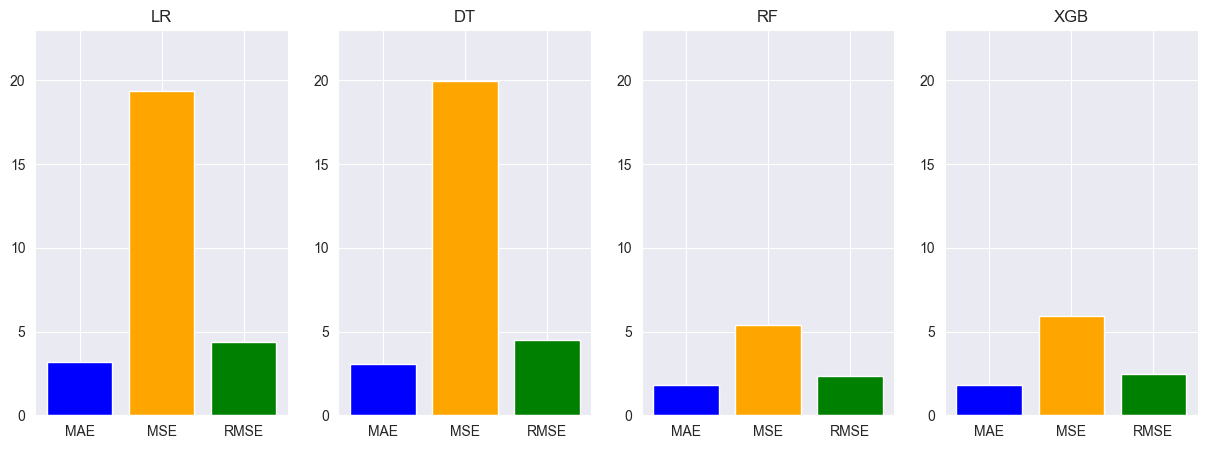

In [26]:
metrics = ['MAE', 'MSE', 'RMSE']
values_lr = [lr_mae, lr_mse, lr_rmse]
values_dt = [dt_mae, dt_mse, dt_rmse]
values_rf = [rf_mae, rf_mse, rf_rmse]
values_xgb = [xgb_mae, xgb_mse, xgb_rmse]

colors = ['blue', 'orange', 'green']

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.bar(metrics, values_lr, color=colors)
plt.title('LR')
plt.ylim(0, 23)

plt.subplot(1, 4, 2)
plt.bar(metrics, values_dt, color=colors)
plt.title('DT')
plt.ylim(0, 23)

plt.subplot(1, 4, 3)
plt.bar(metrics, values_rf, color=colors)
plt.title('RF')
plt.ylim(0, 23)

plt.subplot(1, 4, 4)
plt.bar(metrics, values_xgb, color=colors)
plt.title('XGB')
plt.ylim(0, 23)
